<a href="https://colab.research.google.com/github/nimu77/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
from scipy import stats
import pandas as pd

In [149]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
sales

[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [231]:
# creating a dataframe that holds sales column
df = pd.DataFrame({'sales': [3505, 2400, 3027, 2798, 3700, 3250, 2689]})
df

,sales
0,3505
1,2400
2,3027
3,2798
4,3700
5,3250
6,2689


In [0]:
# making a function to calculate the mean
def average(value):
  ''' to find the mean of the list '''
  each_element = [i for i in value]
  sum_of_element = sum(each_element)
  average_value = sum_of_element / len(each_element)
  return average_value

In [243]:
# calculating mean by using my function
average(df['sales'])

3052.714285714286

In [244]:
# checking it with numpy function
np.mean(df['sales'])

3052.714285714286

In [0]:
# def var_(variance):
#   e = [(i - mean_sales)**2 for i in variance]
#   sums_v = sum(e)
#   v = sums_v / (len(e) - 1)
#   return v

In [0]:
# making function to calculate variance
def find_variance(sample):
  '''calculate variance'''
  # creating variable to capture all the elements from the list
  each_elements = [i for i in sample]
  # summing all the elements of the list
  sum_of_elements = sum(each_elements)
  # dividing sum of elements by length of the elements in the list to find the average
  ave_sample = sum_of_elements / len(each_elements)
  # computing formula to find out variance
  sum_of_variance = sum([(i-ave_sample)**2 for i in sample])
  var_of_sample = sum_of_variance / (len(each_elements)-1)
  return var_of_sample

In [250]:
# finding variance using my own function
find_variance(df['sales'])

214387.90476190473

In [251]:
# checking it with numpy var function
np.var(sales, ddof=1)

214387.90476190473

In [0]:
# making function to calculate standard deviation
def find_std(sample_value):
  '''calculate std'''
  # using find_variance() here to find out the variance 
  var_of_sample_value = find_variance(sample_value)
  # finding the square root of the variance
  sample_std = var_of_sample_value**.5
  return sample_std

In [253]:
find_std(sales)

463.0204150595357

In [254]:
np.std(sales, ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [255]:
df['no_of_customers'] = [127, 80, 105, 92, 120, 115, 93]
df

,sales,no_of_customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [227]:
df.cov()

,sales,no_of_customers
sales,214387.904762,7604.357143
no_of_customers,7604.357143,290.952381


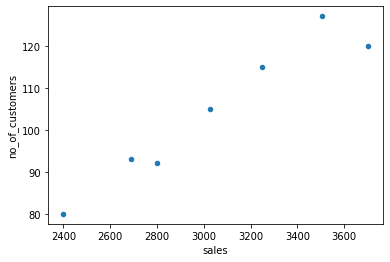

In [257]:
df.plot.scatter('sales', 'no_of_customers');

#### The covariance of last week's sales numbers and the number of customers that entered the store last week is 7604.357143

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [228]:
find_std(df['no_of_customers'])

17.057326313123664

In [258]:
find_std(df['sales'])

463.0204150595357

In [267]:
# covariance specifically of sales and no_of_customers
covariance_ = df.cov()['sales']['no_of_customers']
covariance_

7604.357142857142

In [269]:
covariance_ / (find_std(df['sales'])*find_std(df['no_of_customers']))

0.9628339778148909

In [229]:
df.corr()

,sales,no_of_customers
sales,1.000000,0.962834
no_of_customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [261]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titanic = titanic.drop(columns='Unnamed: 0')

In [270]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [271]:
titanic.isnull().sum()

pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [272]:
titanic.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [273]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [274]:
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [275]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

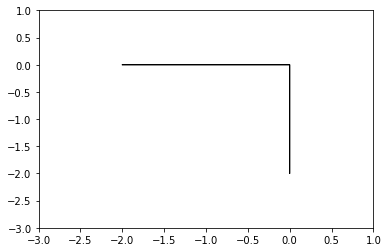

In [289]:
a = np.array([-2, 0])
b = np.array([0, -2])
plt.arrow(0, 0, a[0], a[1])
plt.arrow(0, 0, b[0], b[1])
plt.xlim(-3, 1)
plt.ylim(-3, 1)
plt.show()

In [290]:
np.vdot(a, b)

0

- The synonym for orthogonal is perpendicular or things that are right angle to one another.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

In [292]:
np.vdot(a, b)

-40

- The following vectors are not orthogonal because the dot product of these two vectors is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([[2, -15, 6, 20]])

In [301]:
norm = np.linalg.norm(c)
norm

25.787593916455254

In [302]:
norm**2

665.0

In [303]:
np.vdot(c, c)

665

In [304]:
transpose_c = c.T
transpose_c

array([[  2],
       [-15],
       [  6],
       [ 20]])

In [307]:
np.matmul(c, transpose_c)

array([[665]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

# 1. Vectors as a linear combination of scalars and unit vectors

\begin{align}
 d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\end{align}

 vectors starts at the origin and extends to the point $(7, 12)$
 
 rewriting it in terms of a linear combination of scaled unit vectors:

 \begin{align}
 d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

This says that matrix $\begin{bmatrix} 7 \\ 12 \end{bmatrix}$ will result from scaling the $\hat{i}$ unit vector by 7, the $\hat{j}$ vector by 12 and then adding the two together.

# 2. Vectors as a linear combination of scalars and unit vectors

\begin{align}
 e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}
\end{align}

 vectors starts at the origin and extends to the point $(2, 11, -8)$
 
 rewriting it in terms of a linear combination of scaled unit vectors:

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])

In [310]:
norm_of_f = np.linalg.norm(f)
norm_of_f

19.131126469708992

In [312]:
unit_vec_of_f = f / norm_of_f
unit_vec_of_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

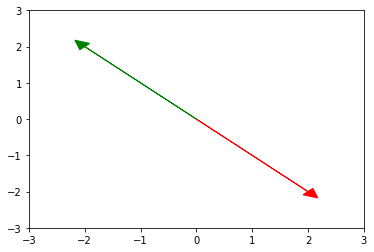

In [315]:
# plot linearly dependent vectors

# Original Vector
v = np.array([2, -2])

# scaled vector
v1 = -1* v

#plot vectors
plt.arrow(0, 0, v[0], v[1], head_width=.25, head_length=.25, color='red')
plt.arrow(0, 0, v1[0], v1[1], head_width=.25, head_length=.25, color='green')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

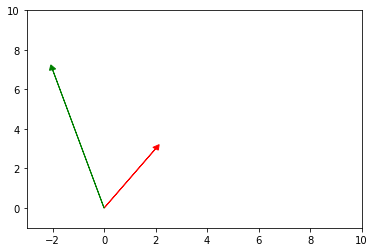

In [323]:
# plot linearly independent vectors

# Original vectors
t = np.array([2, 3])


t1 = np.array([-2, 7])

#plot vectors
plt.arrow(0, 0, t[0], t[1], head_width=.25, head_length=.25, color='red')
plt.arrow(0, 0, t1[0], t1[1], head_width=.25, head_length=.25, color='green')
plt.xlim(-3, 10)
plt.ylim(-1,10)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1, 2])
h = np.array([4, 8])

In [0]:
# composing them into matrix
i = np.array([[1, 2], [4, 8]])

In [340]:
i

array([[1, 2],
       [4, 8]])

In [341]:
np.linalg.matrix_rank(i)

1

#### The span of the vectors is 1. So, only 1 dimension of space can be created.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [342]:
o = np.array([[1, 2, 3], 
              [-1, 0, 7], 
              [4, 8, 2]])
o

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [343]:
np.linalg.matrix_rank(o)

3

#### The span of the vectors is 3. It has 3 dimensional space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



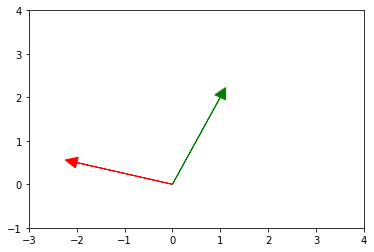

In [345]:
q = np.array([-2, .5])
r = np.array([1, 2])

#plot vectors
plt.arrow(0, 0, q[0], q[1], head_width=.25, head_length=.25, color='red')
plt.arrow(0, 0, r[0], r[1], head_width=.25, head_length=.25, color='green')
plt.xlim(-3, 4)
plt.ylim(-1,4)
plt.show()

In [346]:
s = np.array([[-2, .5], [1, 2]])
s

array([[-2. ,  0.5],
       [ 1. ,  2. ]])

In [347]:
np.linalg.matrix_rank(s)

2

## 6.2 What does it mean to form a basis?

#### To form a basis means that the vectors are linearly independent and that it spans the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [348]:
P = np.array([[1, 2, 3], 
              [-1, 0, 7], 
              [4, 8, 2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

#### Rank tell us if the vectors inside the matrix are linearly independent or not. For the above question, we got 3. It means all the vectors inside the matrix are linearly independent.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

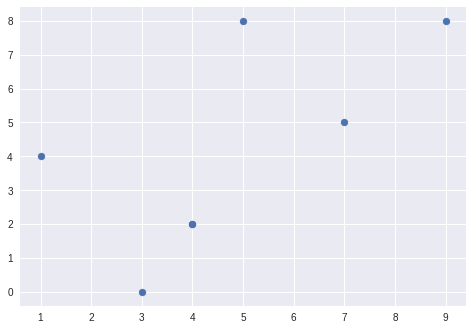

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()